In [1]:
from models import KMeans
import pandas as pd
from models.metrics import Metric, Average, silhouette_score
from models.model_selection import train_test_split, evaluate, plot_silhouette_scores, plot_elbow_method, PlotType, plot
from typing import get_args
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

# Load data

In [2]:
data = pd.read_csv('../data/Dataset1.csv')
data

N     P    K    pH    EC    OC      S    Zn    Fe    Cu     Mn     B  \
0    138   8.6  560  7.46  0.62  0.70   5.90  0.24  0.31  0.77   8.71  0.11   
1    213   7.5  338  7.62  0.75  1.06  25.40  0.30  0.86  1.54   2.89  2.29   
2    163   9.6  718  7.59  0.51  1.11  14.30  0.30  0.86  1.57   2.70  2.03   
3    157   6.8  475  7.64  0.58  0.94  26.00  0.34  0.54  1.53   2.65  1.82   
4    270   9.9  444  7.63  0.40  0.86  11.80  0.25  0.76  1.69   2.43  2.26   
..   ...   ...  ...   ...   ...   ...    ...   ...   ...   ...    ...   ...   
880  276   9.2  370  7.62  0.62  0.49   6.64  0.42  3.57  0.63   6.48  0.32   
881  320  13.8  391  7.38  0.65  1.07   5.43  0.58  4.58  1.02  13.25  0.53   
882  264  10.3  475  7.49  0.74  0.88  10.56  0.45  7.36  1.87  10.63  0.63   
883  220   8.6  444  7.43  0.65  0.72  11.70  0.37  0.66  0.90   2.19  1.82   
884  270   8.1  655  7.45  0.55  0.67  10.20  0.28  0.44  1.26   7.75  2.56   

         OM  Fertility  
0    1.2040          0  
1    1.8232          0  
2    1.9092          0  
3    1.6168          0  
4    1.4792          1  
..      ...        ...  
880  0.8428          1  
881  1.8404          2  
882  1.5136          0  
883  1.2384          0  
884  1.1524          1  

[885 rows x 14 columns]

In [3]:
target_column = 'Fertility'
normalization_type = 'minmax'

In [4]:
from models import preprocessing

X, Y = preprocessing.treat_data(data, target_column=target_column, normalization=normalization_type)
X

N         P         K        pH        EC        OC         S  \
0    0.264264  0.435115  0.552288  0.479167  0.560000  0.512821  0.422151   
1    0.489489  0.351145  0.189542  0.645833  0.733333  0.820513  0.553960   
2    0.339339  0.511450  0.810458  0.614583  0.413333  0.863248  0.493747   
3    0.321321  0.297710  0.413399  0.666667  0.506667  0.717949  0.553960   
4    0.660661  0.534351  0.362745  0.656250  0.266667  0.649573  0.895666   
..        ...       ...       ...       ...       ...       ...       ...   
878  0.903904  0.595420  0.655229  1.000000  0.413333  0.162393  0.529695   
879  0.642643  0.465649  0.431373  0.250000  0.360000  0.000000  0.263242   
880  0.678679  0.480916  0.241830  0.645833  0.560000  0.333333  0.481541   
881  0.810811  0.832061  0.276144  0.395833  0.600000  0.829060  0.384430   
882  0.642643  0.564885  0.413399  0.510417  0.720000  0.666667  0.796148   

           Zn        Fe        Cu        Mn         B        OM  
0    0.250000  0.009671  0.338308  0.462366  0.056818  0.512821  
1    0.338235  0.062863  0.721393  0.149462  0.601719  0.820513  
2    0.338235  0.062863  0.736318  0.139247  0.601719  0.863248  
3    0.397059  0.031915  0.716418  0.136559  0.601719  0.717949  
4    0.264706  0.053191  0.796020  0.124731  0.601719  0.649573  
..        ...       ...       ...       ...       ...       ...  
878  0.426471  0.433269  0.298507  0.587097  0.715909  0.162393  
879  0.411765  0.778530  0.179104  0.423118  0.386364  0.000000  
880  0.514706  0.324952  0.268657  0.342473  0.295455  0.333333  
881  0.750000  0.422631  0.462687  0.706452  0.534091  0.829060  
882  0.558824  0.691489  0.885572  0.565591  0.647727  0.666667  

[882 rows x 13 columns]

In [5]:
# save processed data
pd.concat([X, Y], axis=1).to_csv(f'../data/Dataset1_preprocessed_{normalization_type}.csv', index=False)

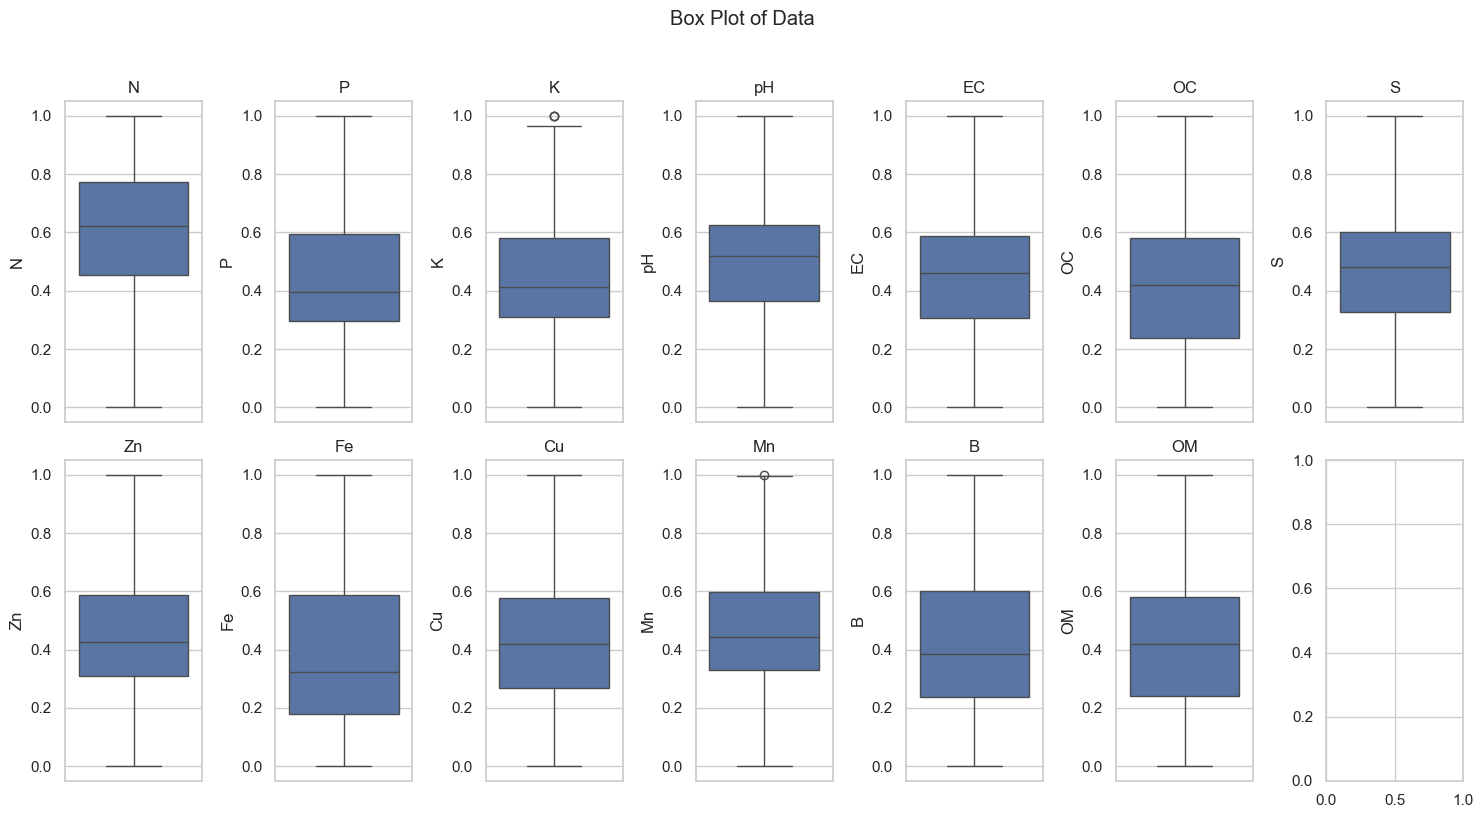

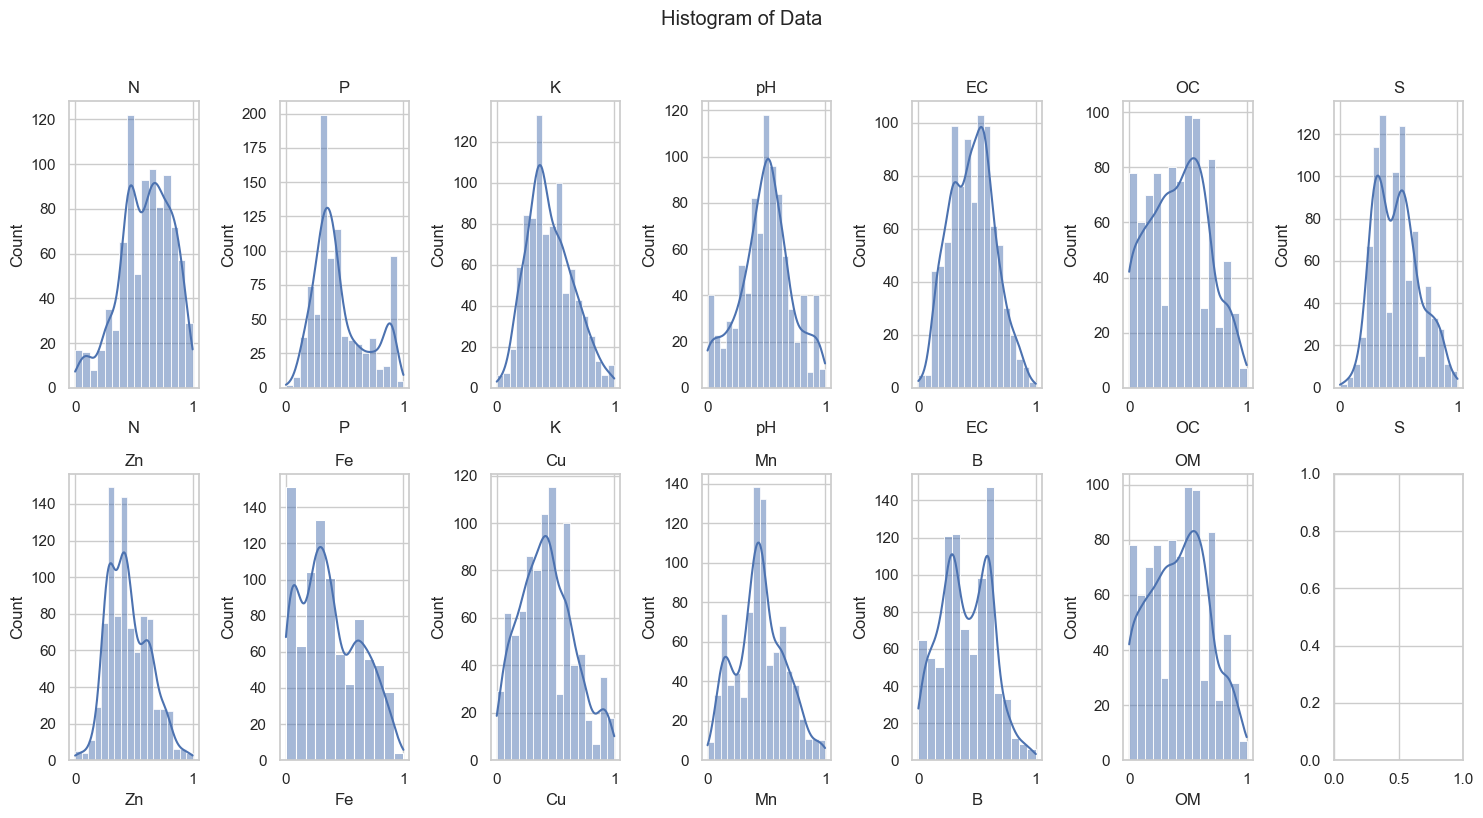

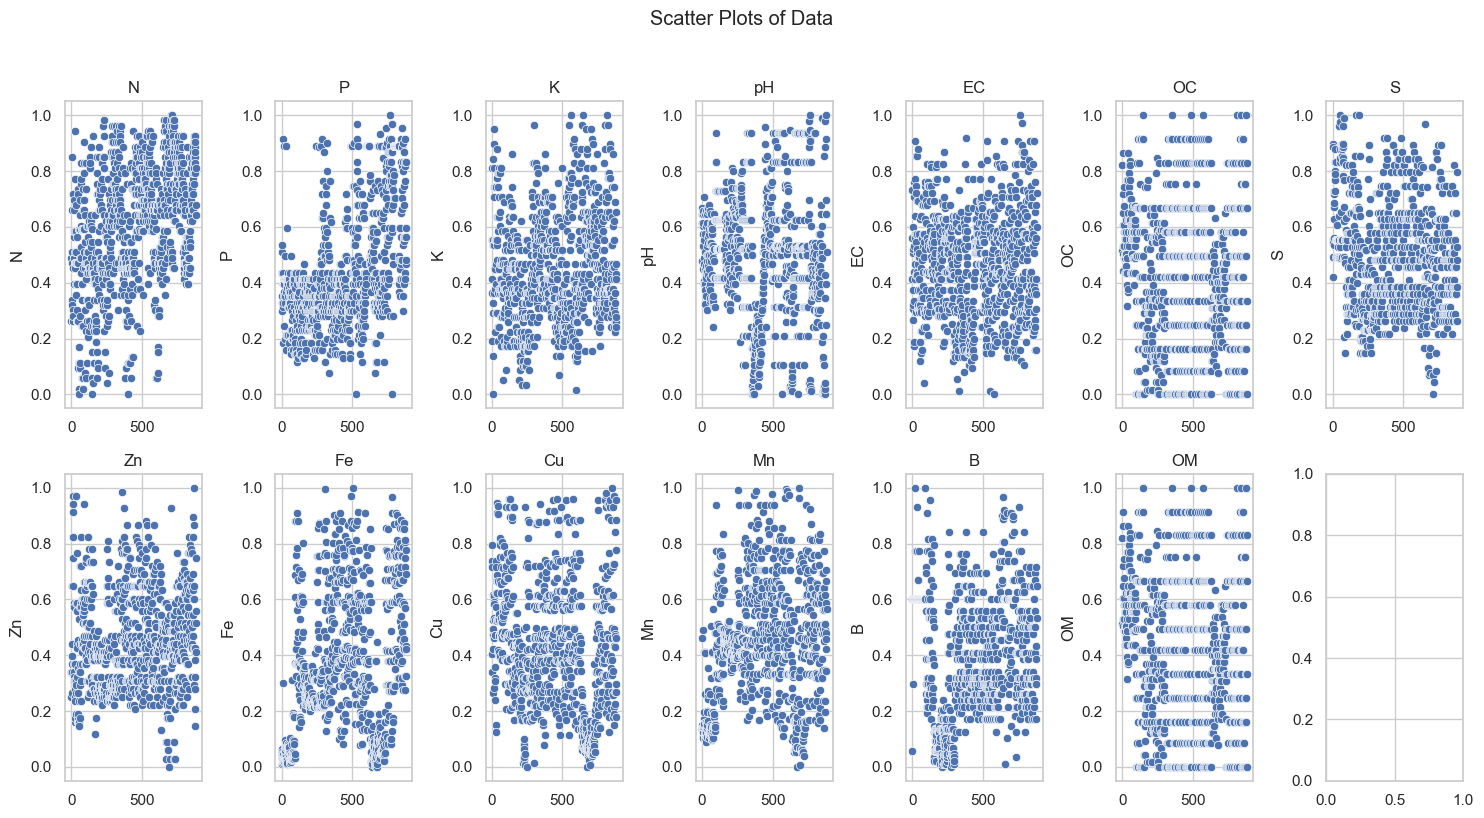

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(706, 13) (176, 13) (706,) (176,)


# 1. Kmeans

100%|██████████| 5/5 [00:30<00:00,  6.17s/it]


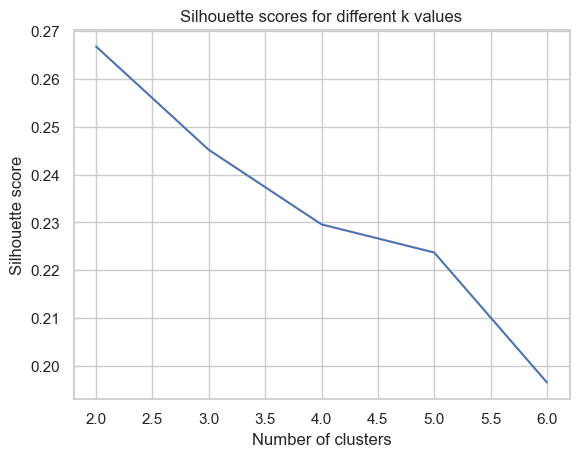

In [8]:
plot_silhouette_scores(X, k_range=range(2, 7), strategy='cosine')

100%|██████████| 9/9 [00:06<00:00,  1.43it/s]


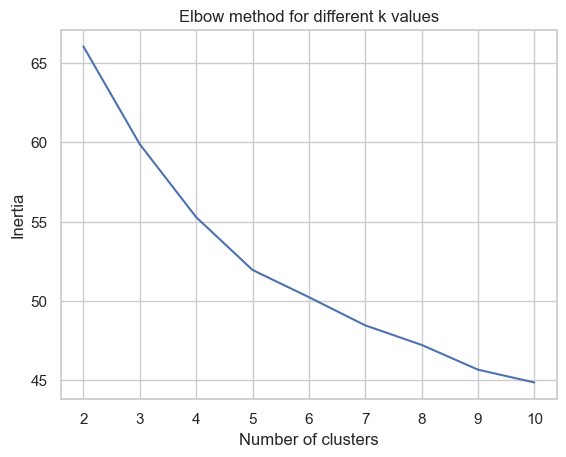

In [19]:
plot_elbow_method(X, k_range=range(2, 11), strategy='cosine')

- we can see that the best number of clusters is 3

In [10]:
kmeans = KMeans(num_clusters=3, max_iter=100)

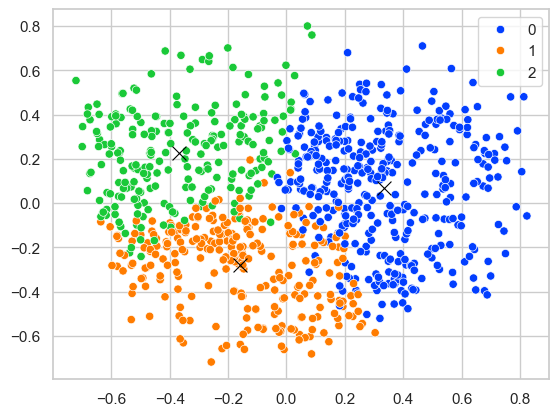

In [11]:
kmeans.fit(X)
kmeans.plot(X)

In [12]:
models = []
for func in ['euclidean', 'manhattan', 'minkowski', 'cosine']:
    models.extend([KMeans(num_clusters=k, max_iter=150, distance_metric=func) for k in range(2, 7)])
models

[KMeans(num_clusters=2, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=euclidean_distance, max_iter=150),
 KMeans(num_clusters=2, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=5, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=6, distance_metric=manhattan_distance, max_iter=150),
 KMeans(num_clusters=2, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=3, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=4, distance_metric=minkowski_distance, max_iter=150),
 KMeans(num_clusters=5, d

# Evaluation with different metrics

<h3>1. Silhouette Score </h3>

In [13]:
results = []
for model in models:
    model.fit(X)
    results.append({
        'model': model,
        'silhouette_score': silhouette_score(X.values, model.labels_, strategy=model.distance_metric.__name__.split('_')[0]),
    })
pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False)

model  silhouette_score
15  KMeans(num_clusters=2, distance_metric=cosine_...          0.266876
16  KMeans(num_clusters=3, distance_metric=cosine_...          0.247948
17  KMeans(num_clusters=4, distance_metric=cosine_...          0.229525
18  KMeans(num_clusters=5, distance_metric=cosine_...          0.205404
19  KMeans(num_clusters=6, distance_metric=cosine_...          0.204771
5   KMeans(num_clusters=2, distance_metric=manhatt...          0.161019
0   KMeans(num_clusters=2, distance_metric=euclide...          0.143820
10  KMeans(num_clusters=2, distance_metric=minkows...          0.143766
1   KMeans(num_clusters=3, distance_metric=euclide...          0.138720
11  KMeans(num_clusters=3, distance_metric=minkows...          0.138593
7   KMeans(num_clusters=4, distance_metric=manhatt...          0.136310
6   KMeans(num_clusters=3, distance_metric=manhatt...          0.131030
2   KMeans(num_clusters=4, distance_metric=euclide...          0.125664
9   KMeans(num_clusters=6, distance_metric=manhatt...          0.124869
12  KMeans(num_clusters=4, distance_metric=minkows...          0.124641
3   KMeans(num_clusters=5, distance_metric=euclide...          0.117946
8   KMeans(num_clusters=5, distance_metric=manhatt...          0.117446
4   KMeans(num_clusters=6, distance_metric=euclide...          0.114426
14  KMeans(num_clusters=6, distance_metric=minkows...          0.113893
13  KMeans(num_clusters=5, distance_metric=minkows...          0.106612

In [14]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

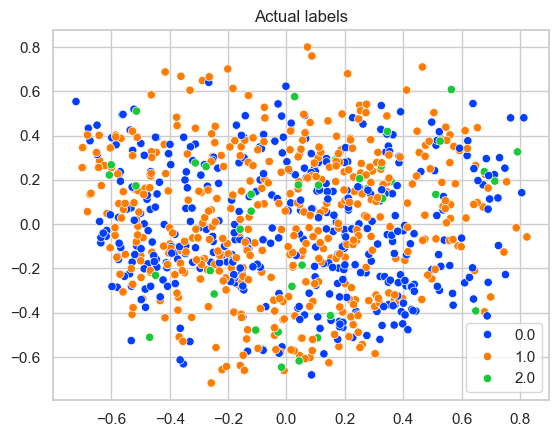

In [15]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Y, palette='bright')

plt.title('Actual labels')
plt.legend()
plt.show()

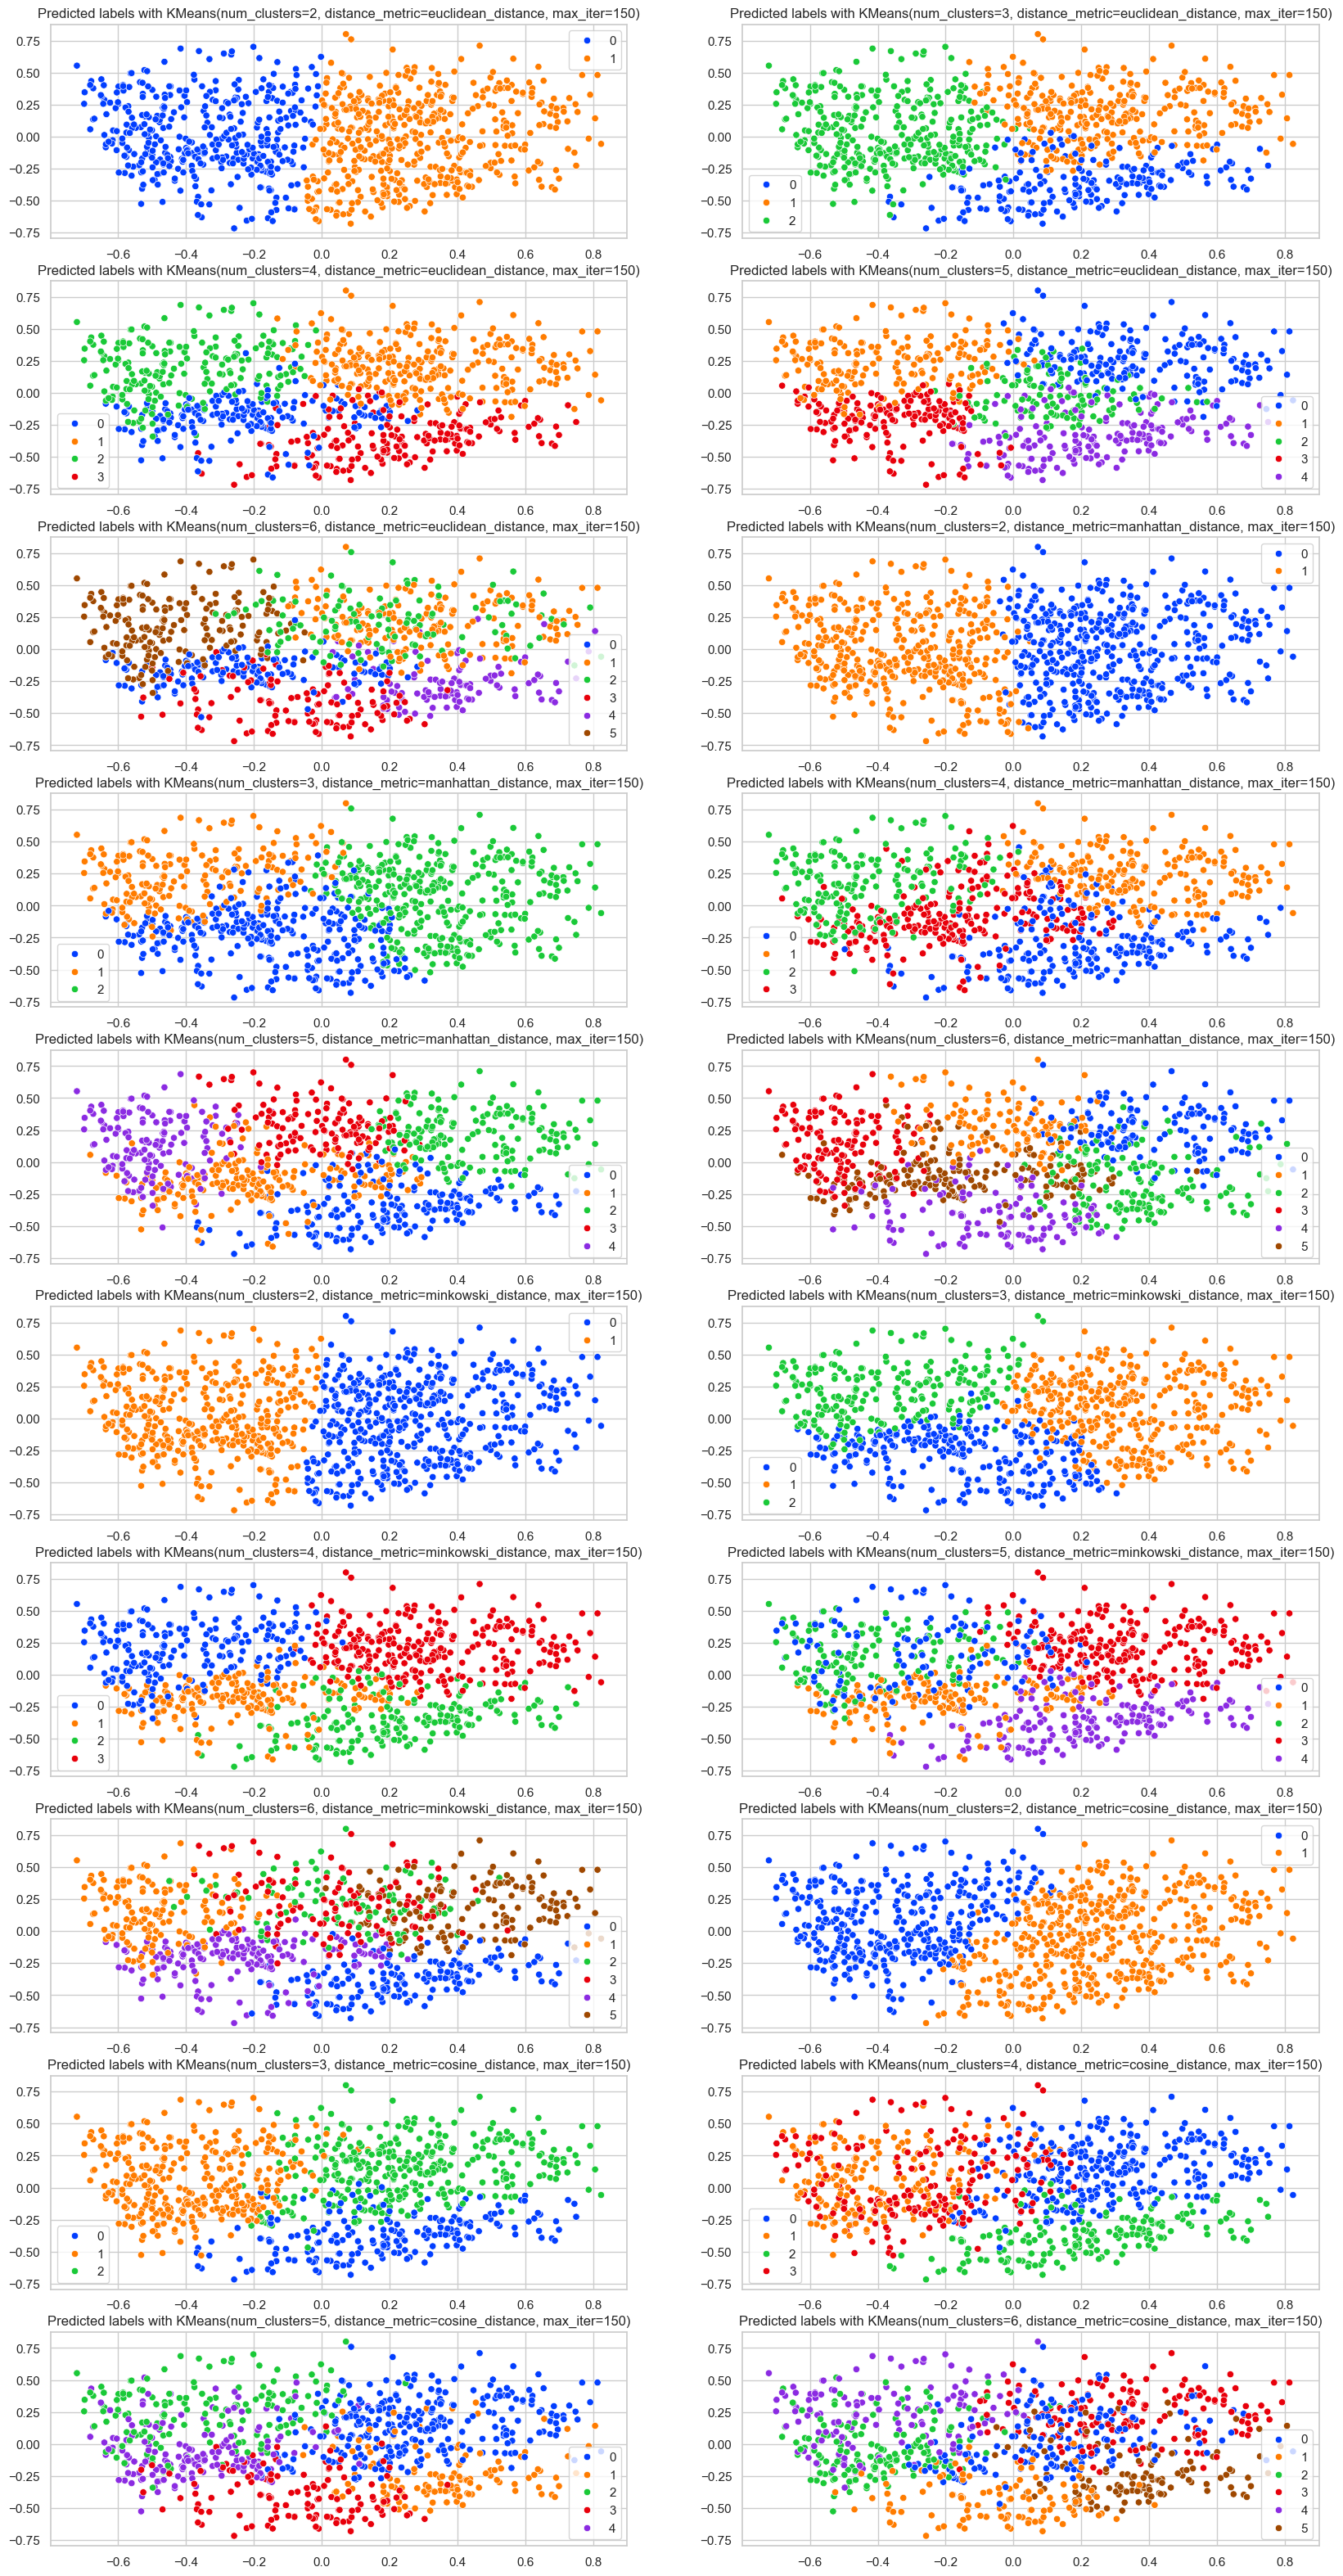

In [16]:
num_rows = (len(models) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 40))

for i, model in enumerate(models):
    model.fit(X)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=model.labels_, palette='bright', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Predicted labels with {model}')
    axes[i // 2, i % 2].legend()

<h3>2. the usual metrics  </h3>

In [17]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

In [18]:
evaluate(X_test, Y_test, models, get_args(Metric), averages)

model  accuracy  \
0   KMeans(num_clusters=2, distance_metric=euclide...  0.511364   
1   KMeans(num_clusters=3, distance_metric=euclide...  0.352273   
2   KMeans(num_clusters=4, distance_metric=euclide...  0.318182   
3   KMeans(num_clusters=5, distance_metric=euclide...  0.136364   
4   KMeans(num_clusters=6, distance_metric=euclide...  0.255682   
5   KMeans(num_clusters=2, distance_metric=manhatt...  0.443182   
6   KMeans(num_clusters=3, distance_metric=manhatt...  0.284091   
7   KMeans(num_clusters=4, distance_metric=manhatt...  0.312500   
8   KMeans(num_clusters=5, distance_metric=manhatt...  0.278409   
9   KMeans(num_clusters=6, distance_metric=manhatt...  0.079545   
10  KMeans(num_clusters=2, distance_metric=minkows...  0.443182   
11  KMeans(num_clusters=3, distance_metric=minkows...  0.375000   
12  KMeans(num_clusters=4, distance_metric=minkows...  0.267045   
13  KMeans(num_clusters=5, distance_metric=minkows...  0.113636   
14  KMeans(num_clusters=6, distance_metric=minkows...  0.193182   
15  KMeans(num_clusters=2, distance_metric=cosine_...  0.500000   
16  KMeans(num_clusters=3, distance_metric=cosine_...  0.318182   
17  KMeans(num_clusters=4, distance_metric=cosine_...  0.193182   
18  KMeans(num_clusters=5, distance_metric=cosine_...  0.170455   
19  KMeans(num_clusters=6, distance_metric=cosine_...  0.125000   

    precision_(macro)  precision_(micro)  precision_(weighted)  \
0            0.340913           0.511364              0.488125   
1            0.405195           0.352273              0.557733   
2            0.403614           0.411765              0.547774   
3            0.214896           0.247423              0.307692   
4            0.479263           0.523256              0.599853   
5            0.295435           0.443182              0.423009   
6            0.303260           0.284091              0.415438   
7            0.447276           0.440000              0.600248   
8            0.380491           0.418803              0.496815   
9            0.223016           0.181818              0.319318   
10           0.295435           0.443182              0.423009   
11           0.344320           0.375000              0.464841   
12           0.350408           0.361538              0.490925   
13           0.205556           0.215054              0.294318   
14           0.320502           0.377778              0.458901   
15           0.333333           0.500000              0.477273   
16           0.334592           0.318182              0.458512   
17           0.235803           0.253731              0.327346   
18           0.238544           0.243902              0.310708   
19           0.307527           0.261905              0.440323   

    recall_(macro)  recall_(micro)  recall_(weighted)  f1-score_(macro)  \
0         0.357143        0.511364           0.511364          0.348794   
1         0.396825        0.352273           0.352273          0.319442   
2         0.335317        0.318182           0.318182          0.310071   
3         0.095238        0.136364           0.136364          0.131903   
4         0.329365        0.255682           0.255682          0.328437   
5         0.309524        0.443182           0.443182          0.302276   
6         0.311508        0.284091           0.284091          0.250149   
7         0.369048        0.312500           0.312500          0.324316   
8         0.307540        0.278409           0.278409          0.295098   
9         0.055556        0.079545           0.079545          0.088950   
10        0.309524        0.443182           0.443182          0.302276   
11        0.375000        0.375000           0.375000          0.318580   
12        0.224206        0.267045           0.267045          0.251832   
13        0.079365        0.113636           0.113636          0.113914   
14        0.134921        0.193182           0.193182          0.189777   
15        0.349206        0.500000           0.500000

 we can see that the Kmeans clustering algorithm does not do well on metrics that require the true labels of the data such as ( accuracy, precision, recall, f1_score, roc_auc_score) and that is because the algorithm does not use the labels to cluster the data